<a href="https://colab.research.google.com/github/JessicaTaylor7/CSCI409/blob/main/Lab05_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

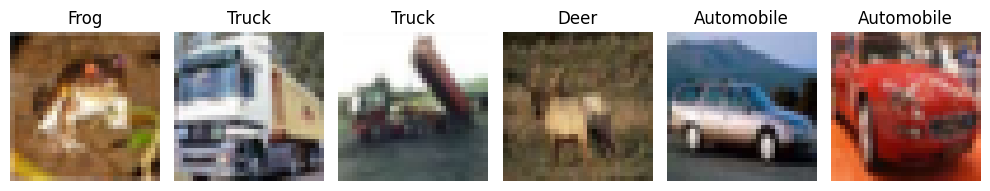

In [4]:
# Part 1: Successfully load the CIFAR-10 dataset and display sample images
# Keras library already installed

from keras.datasets import cifar10  # Import CIFAR-10 dataset from Keras
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import numpy as np                  # Import numpy for numerical operations

# Load the CIFAR-10 dataset
# CIFAR-10 contains 60,000 images (50,000 training and 10,000 testing)
# divided into 10 classes such as airplanes, cars, birds, etc.
(x_training, y_training), (x_testing, y_testing) = cifar10.load_data()

# Normalize the data
# Pixel values in the images are in the range 0-255.
# Dividing by 255.0 scales them to the range 0-1 for faster training.
x_training, x_test = x_training / 255.0, x_testing / 255.0

# Define class names corresponding to CIFAR-10 dataset labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create a figure with 6 subplots to display sample images
fig, axes = plt.subplots(1, 6, figsize=(10, 5))  # Create 1 row with 6 subplots, set figure size
for i in range(6):  # Loop over the first 6 images in the training dataset
    axes[i].imshow(x_training[i])  # Display the i-th image
    axes[i].set_title(class_names[y_training[i][0]])  # Set the title to the corresponding class name
    axes[i].axis('off')  # Turn off axis lines and labels for better visualization

# Adjust layout and show the figure
plt.tight_layout()  # Adjust spacing between subplots for neatness
plt.show()  # Display the plotted images




In [5]:
# Part 2: Build a CNN model
# Import necessary modules from Keras
from keras.models import Sequential       # Sequential model allows stacking layers linearly
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # Import essential layer types

# Build the CNN model
model = Sequential([  # Define a sequential model (layers stacked sequentially)

    # First convolutional layer
    # 32 filters of size 3x3 applied to the input image
    # ReLU activation adds non-linearity
    # Input shape is (32, 32, 3), representing 32x32 RGB images
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    # First max-pooling layer
    # Reduces spatial dimensions by taking the maximum value over a 2x2 window
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    # Increases the number of filters to 64 to capture more complex features
    Conv2D(64, (3, 3), activation='relu'),

    # Second max-pooling layer
    # Again reduces spatial dimensions to prevent overfitting and reduce computation
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    # Further increases the number of filters to 128 for capturing high-level features
    Conv2D(128, (3, 3), activation='relu'),

    # Third max-pooling layer
    # Down-samples spatial dimensions further, focusing on prominent features
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    # Converts the 3D feature maps into a 1D vector for input to dense layers
    Flatten(),

    # Fully connected (dense) layer
    # Contains 128 neurons with ReLU activation for learning high-level patterns
    Dense(128, activation='relu'),

    # Output layer
    # Contains 10 neurons (one for each class in CIFAR-10)
    # Softmax activation outputs probabilities for each class
    Dense(10, activation='softmax')
])

# Print a summary of the model
# The summary shows the structure, the number of parameters in each layer, and the total parameters
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 48ms/step - accuracy: 0.3384 - loss: 1.7925 - val_accuracy: 0.5298 - val_loss: 1.2957
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.5778 - loss: 1.1914 - val_accuracy: 0.6024 - val_loss: 1.1419
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6437 - loss: 1.0106 - val_accuracy: 0.6241 - val_loss: 1.0847
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 44ms/step - accuracy: 0.6878 - loss: 0.8978 - val_accuracy: 0.6750 - val_loss: 0.9421
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7198 - loss: 0.8025 - val_accuracy: 0.6513 - val_loss: 1.0345
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7448 - loss: 0.7287 - val_accuracy: 0.6921 - val_loss: 0.9105
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.7696 - loss: 0.6681 - val_accuracy: 0.6904 - val_loss: 0.9113
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7916 -

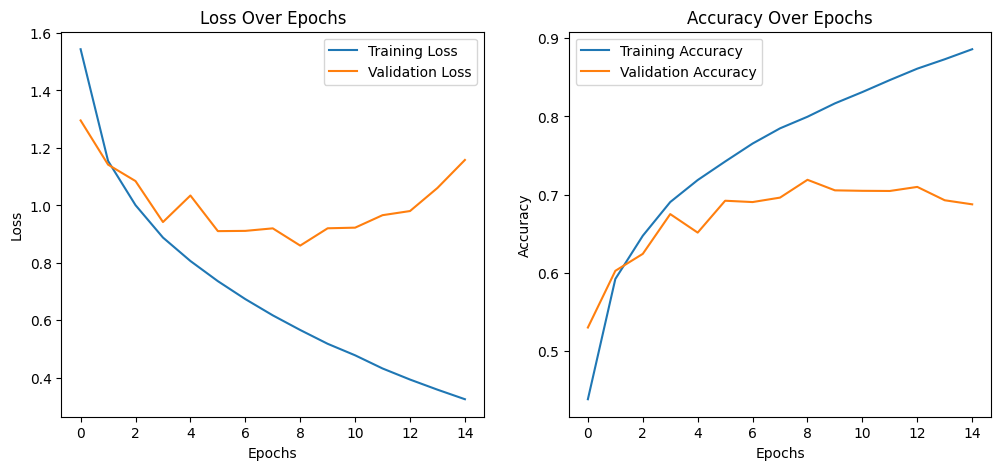

In [6]:
# Part 3: Compile and train model
# Plot training and validation loss and accuracy
import matplotlib.pyplot as plt

# Compile the model
# The optimizer 'adam' is used for efficient gradient-based optimization.
# The loss function 'sparse_categorical_crossentropy' is suitable for multi-class classification problems with integer labels.
# The metric 'accuracy' is used to monitor the proportion of correctly classified samples during training.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# The model is trained using the training data (x_training, y_training) for 15 epochs.
# 20% of the training data is set aside for validation (validation_split=0.2).
# The fit method returns a 'history' object containing details about the training process (ex., loss and accuracy for each epoch).
history = model.fit(x_training, y_training, epochs=15, validation_split=0.2)

# Create a figure to plot the training and validation metrics
plt.figure(figsize=(12, 5))  # Set the size of the figure to 12 inches wide and 5 inches tall

# Plot the training and validation loss
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x2 grid
plt.plot(history.history['loss'], label='Training Loss')  # Plot the training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss over epochs
plt.title('Loss Over Epochs')  # Add a title to the plot
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.legend()  # Add a legend to distinguish between training and validation loss

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)  # Create the second subplot in a 1x2 grid
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy over epochs
plt.title('Accuracy Over Epochs')  # Add a title to the plot
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.legend()  # Add a legend to distinguish between training and validation accuracy

# Display the plots
plt.show()  # Render the figure and display the plots


In [7]:
# Part 4: Evaluate model performance

# Evaluate the model on the test set
# The evaluate() method calculates the loss and accuracy of the trained model on unseen data (test set).
# - x_testing: The test input data (features).
# - y_testing: The corresponding labels for the test data.
# - verbose=2: Controls the verbosity of the output; 2 provides more detailed output of the evaluation process.
test_loss, test_accuracy = model.evaluate(x_testing, y_testing, verbose=2)

# Print the evaluation results
# Display the test loss (how well the model fits the test data) and test accuracy (percentage of correct predictions).
# These metrics provide an indication of the model's generalization performance on unseen data.
print(f"Test Loss: {test_loss}")  # Print the final loss value for the test dataset
print(f"Test Accuracy: {test_accuracy}")  # Print the final accuracy value for the test dataset


313/313 - 4s - 12ms/step - accuracy: 0.4744 - loss: 425.9461
Test Loss: 425.9461364746094
Test Accuracy: 0.47440001368522644
